In [ ]:
import numpy as np 
import pandas as pd 
import nltk   #here nltk is natural language processing
from nltk.corpus import stopwords
import string

In [ ]:
#load datasets
dataset = pd.read_csv("/content/drive/MyDrive/Data_sets/student_info.csv")

In [ ]:
#read dataset
dataset

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
...,...,...
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05


In [ ]:
#print rows and columns 
dataset.shape 

(200, 2)

In [ ]:
dataset.corr()

,study_hours,student_marks
study_hours,1.000000,0.979919
student_marks,0.979919,1.000000


In [ ]:
dataset.info

<bound method DataFrame.info of      study_hours  student_marks
0           6.83          78.50
1           6.56          76.74
2            NaN          78.68
3           5.67          71.82
4           8.67          84.19
..           ...            ...
195         7.53          81.67
196         8.56          84.68
197         8.94          86.75
198         6.60          78.05
199         8.35          83.50

[200 rows x 2 columns]>

In [ ]:
dataset.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer


In [ ]:
imputer = SimpleImputer(missing_values= np.NAN, strategy= 'mean', fill_value=None, verbose=1, copy=True)
#Fitting imputer object to the independent variables x.   
imputer = imputer.fit(dataset.iloc[:,0:1]) 
#Replacing missing data with the calculated mean value  
dataset.iloc[:,0:1]= imputer.transform(dataset.iloc[:,0:1]) 


In [ ]:
dataset

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19
...,...,...
195,7.530000,81.67
196,8.560000,84.68
197,8.940000,86.75
198,6.600000,78.05


In [ ]:
dataset.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [ ]:
#indepednt variable 
X  = dataset.iloc[:,0].values

In [ ]:
X

array([6.83      , 6.56      , 6.99594872, 5.67      , 8.67      ,
       7.55      , 6.67      , 8.99      , 5.19      , 6.75      ,
       6.59      , 8.56      , 7.75      , 7.9       , 8.19      ,
       6.55      , 6.36      , 8.44      , 8.41      , 7.67      ,
       7.42      , 8.16      , 5.05      , 5.85      , 5.45      ,
       7.96      , 6.51      , 6.73      , 5.94      , 7.48      ,
       8.13      , 6.99594872, 5.4       , 8.78      , 8.72      ,
       7.1       , 7.86      , 7.19      , 5.62      , 7.88      ,
       5.28      , 8.92      , 5.46      , 8.3       , 8.09      ,
       6.18      , 7.01      , 5.01      , 5.54      , 5.09      ,
       5.09      , 7.31      , 8.71      , 5.52      , 8.76      ,
       8.69      , 5.75      , 8.93      , 5.39      , 5.65      ,
       5.49      , 7.26      , 6.35      , 7.72      , 8.88      ,
       5.45      , 7.86      , 8.26      , 5.07      , 8.25      ,
       5.37      , 5.11      , 6.35      , 7.41      , 7.31   

In [ ]:
#dependent variable
y = dataset.iloc[:,1].values
y

array([78.5 , 76.74, 78.68, 71.82, 84.19, 81.18, 76.99, 85.46, 70.66,
       77.82, 75.37, 83.88, 79.5 , 80.76, 83.08, 76.03, 76.04, 85.11,
       82.5 , 80.58, 82.18, 83.36, 70.67, 75.02, 70.96, 83.33, 74.75,
       75.65, 74.15, 80.17, 82.27, 76.14, 71.1 , 84.35, 83.08, 76.76,
       81.24, 78.21, 73.08, 83.23, 70.27, 86.41, 71.1 , 82.84, 82.38,
       72.96, 77.46, 70.11, 72.38, 71.41, 72.22, 77.77, 84.44, 71.45,
       82.21, 85.48, 75.03, 86.65, 70.9 , 71.7 , 73.61, 79.41, 76.19,
       80.43, 85.78, 70.06, 81.25, 81.7 , 69.27, 82.79, 71.8 , 71.79,
       74.97, 78.61, 77.59, 72.33, 72.08, 77.33, 70.05, 73.34, 84.  ,
       82.93, 76.63, 75.36, 77.29, 72.87, 73.4 , 81.74, 71.85, 84.6 ,
       79.56, 82.1 , 72.08, 79.1 , 81.01, 76.48, 75.39, 68.57, 83.64,
       82.3 , 75.18, 82.03, 82.99, 79.26, 77.55, 77.07, 72.1 , 73.25,
       74.25, 70.58, 81.08, 75.04, 76.38, 80.86, 78.42, 74.44, 70.34,
       85.04, 73.61, 75.55, 76.2 , 82.69, 76.83, 79.53, 83.57, 85.95,
       76.02, 77.65,

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [ ]:
X_train

array([6.75      , 7.31      , 5.88      , 8.6       , 7.52      ,
       5.14      , 7.95      , 8.11      , 8.79      , 5.02      ,
       8.19      , 6.73      , 7.43      , 5.54      , 7.01      ,
       8.71      , 7.53      , 5.84      , 6.35      , 6.99594872,
       5.65      , 8.16      , 8.94      , 8.3       , 6.59      ,
       6.35      , 7.41      , 8.56      , 8.42      , 5.39      ,
       6.46      , 7.9       , 6.92      , 7.53      , 5.22      ,
       5.09      , 6.83      , 7.69      , 7.98      , 6.09      ,
       8.88      , 5.07      , 8.92      , 8.25      , 5.09      ,
       5.54      , 5.63      , 7.9       , 7.3       , 5.85      ,
       8.87      , 8.33      , 7.42      , 6.55      , 5.09      ,
       7.23      , 8.71      , 6.24      , 5.11      , 5.67      ,
       5.4       , 7.87      , 6.6       , 6.67      , 5.07      ,
       6.88      , 8.31      , 5.14      , 7.19      , 8.39      ,
       8.2       , 8.35      , 8.56      , 6.6       , 8.26   

In [ ]:
X_test

array([8.41      , 5.19      , 5.72      , 8.88      , 5.79      ,
       8.66      , 7.55      , 7.99      , 7.75      , 8.08      ,
       7.26      , 8.75      , 6.97      , 6.93      , 8.34      ,
       8.99      , 8.78      , 5.64      , 7.19      , 7.31      ,
       8.61      , 8.95      , 6.18      , 7.86      , 5.49      ,
       7.62      , 7.26      , 8.05      , 6.99594872, 8.09      ,
       6.36      , 8.69      , 5.39      , 6.37      , 5.05      ,
       7.26      , 6.33      , 8.67      , 6.01      , 5.34      ,
       6.51      , 7.86      , 6.51      , 7.95      , 7.95      ,
       7.72      , 5.19      , 6.04      , 5.69      , 6.51      ,
       5.11      , 8.69      , 5.22      , 5.2       , 8.97      ,
       5.45      , 8.13      , 7.7       , 5.28      , 5.75      ,
       5.26      , 6.99594872, 5.55      , 7.67      , 5.24      ,
       5.44      , 8.76      ])

In [ ]:
y_train

array([77.07, 77.77, 73.4 , 83.91, 79.56, 71.22, 82.03, 83.82, 84.6 ,
       70.58, 83.08, 75.65, 80.31, 72.01, 77.46, 85.98, 81.67, 74.25,
       76.19, 78.68, 71.7 , 83.15, 86.75, 82.84, 75.37, 74.24, 78.61,
       84.68, 84.24, 71.11, 76.02, 79.1 , 76.38, 81.57, 70.51, 72.22,
       78.5 , 81.01, 81.08, 76.48, 85.78, 70.79, 86.41, 82.79, 71.41,
       72.38, 72.87, 80.76, 79.49, 75.02, 85.1 , 83.48, 82.18, 76.03,
       70.05, 77.55, 84.44, 75.18, 72.08, 71.82, 70.34, 82.04, 78.05,
       76.99, 69.27, 77.29, 82.69, 70.2 , 77.63, 83.37, 82.1 , 83.5 ,
       83.88, 75.55, 82.99, 76.76, 86.65, 70.06, 76.74, 76.2 , 79.17,
       71.1 , 77.07, 75.8 , 70.4 , 85.11, 73.08, 72.46, 71.45, 75.52,
       77.01, 83.08, 74.15, 78.42, 76.7 , 76.14, 81.6 , 77.65, 85.96,
       71.1 , 82.55, 83.08, 74.34, 80.17, 82.3 , 76.63, 73.34, 74.44,
       82.02, 79.64, 74.97, 77.33, 83.33, 71.94, 82.93, 77.27, 73.02,
       73.14, 83.23, 70.9 , 84.58, 71.85, 71.8 , 81.74, 81.24, 83.36,
       77.82, 79.26,

In [ ]:
y_test

array([82.5 , 71.18, 73.25, 83.64, 73.64, 86.99, 81.18, 82.75, 79.5 ,
       81.7 , 79.41, 85.95, 77.19, 78.45, 84.  , 85.46, 84.35, 73.19,
       78.21, 77.59, 83.87, 85.15, 72.96, 80.72, 73.61, 79.53, 78.17,
       79.63, 76.83, 82.38, 76.04, 85.48, 71.87, 75.04, 70.67, 79.87,
       74.49, 84.19, 75.36, 72.1 , 78.39, 81.25, 74.75, 80.86, 82.68,
       80.43, 70.66, 72.33, 73.61, 75.52, 71.79, 83.57, 71.5 , 68.57,
       86.12, 70.96, 82.27, 80.81, 70.27, 75.03, 71.86, 75.39, 71.83,
       80.58, 70.78, 72.08, 82.21])

In [ ]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression


In [ ]:
model = LinearRegression()

In [ ]:
X_train= X_train.reshape(-1,1)

In [ ]:
y_train=y_train.reshape(-1,1)

In [ ]:
X_test=X_test.reshape(-1,1)

In [ ]:
y_test=y_test.reshape(-1,1)

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
print(y_pred)

[[83.58962965]
 [70.86184266]
 [72.95678897]
 [85.44741222]
 [73.23347999]
 [84.57781187]
 [80.19028281]
 [81.92948352]
 [80.98082859]
 [82.28522912]
 [79.04399144]
 [84.93355747]
 [77.89770006]
 [77.73959091]
 [83.31293863]
 [85.8822124 ]
 [85.05213933]
 [72.64057066]
 [78.76730042]
 [79.24162788]
 [84.38017543]
 [85.72410324]
 [74.77504425]
 [81.41562877]
 [72.04766132]
 [80.46697384]
 [79.04399144]
 [82.16664725]
 [78.00026831]
 [82.32475641]
 [75.48653545]
 [84.69639374]
 [71.65238844]
 [75.52606274]
 [70.30846062]
 [79.04399144]
 [75.36795358]
 [84.61733916]
 [74.10308034]
 [71.45475199]
 [76.07944478]
 [81.41562877]
 [76.07944478]
 [81.77137437]
 [81.77137437]
 [80.86224672]
 [70.86184266]
 [74.22166221]
 [72.8382071 ]
 [76.07944478]
 [70.54562435]
 [84.69639374]
 [70.98042453]
 [70.90136995]
 [85.80315782]
 [71.88955217]
 [82.48286556]
 [80.78319215]
 [71.21758826]
 [73.07537083]
 [71.13853368]
 [78.00026831]
 [72.28482506]
 [80.66461028]
 [71.05947911]
 [71.85002488]
 [84.97308

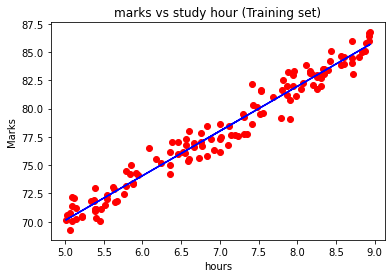

In [ ]:
# Visualising the Training set results
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('marks vs study hour (Training set)')
plt.xlabel('hours')
plt.ylabel('Marks')
plt.show()

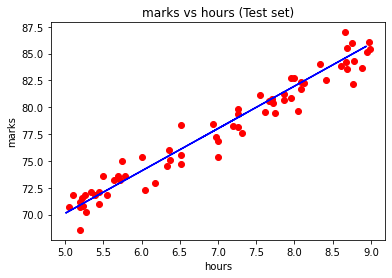

In [ ]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('marks vs hours (Test set)')
plt.xlabel('hours')
plt.ylabel('marks')
plt.show()

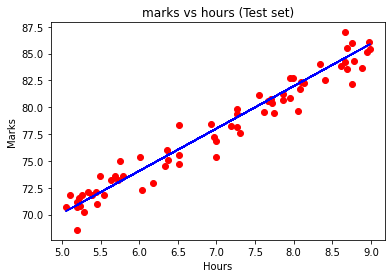

In [ ]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, y_pred, color = 'blue')
plt.title('marks vs hours (Test set)')
plt.xlabel('Hours')
plt.ylabel('Marks')
plt.show()

In [ ]:
print("Regressor slope:  %2.f  "%( model.coef_[0]))
print("Regressor intercept:%2.f  "% model.intercept_)

Regressor slope:   4  
Regressor intercept:50  


In [ ]:
Study_hours = int(input("enter study hours to predict: "))
print("marks:     %.2f"    %(model.predict([[Study_hours]])))

enter study hours to predict: 6
marks:     74.06


In [ ]:
#accuracyy
model.score(X_test,y_test)

0.9490012935809334

NameError: ignored